<h1>CASTILLANO, MARK VINCENT C.</h1>
<hr>
<h3>BSIT-3A</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv('datasets//dengue.csv')

In [3]:
Data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h3>Changing Data Types</h3>

In [4]:
Data.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
Data['Year'] = Data['Year'].astype('int')

In [6]:
Data.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Dengue Cases in Every Region</h1>

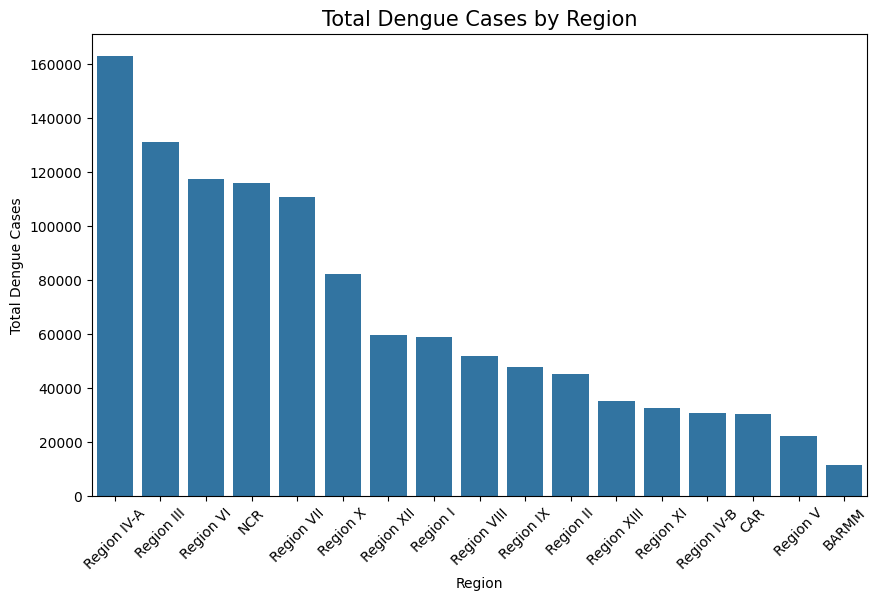

In [7]:
plt.figure(figsize=(10,6))
region_cases = Data.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values(by='Dengue_Cases', ascending=False)
sns.barplot(data=region_cases, x='Region', y='Dengue_Cases')
plt.title('Total Dengue Cases by Region', fontsize=15)
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.show()

<h3>Insigths</h3>
<hr>
<h4>#1 Some regions consistently report much higher case totals, suggesting population density or climate differences.</h4>
<h4>#2 Regions with lower totals may have better prevention or reporting gaps.</h4>
<h4>#3 All regions had dengue cases, somehow their differences are in the count of cases. </h4>

<h1>Total Dengue Case in Every Month</h1>

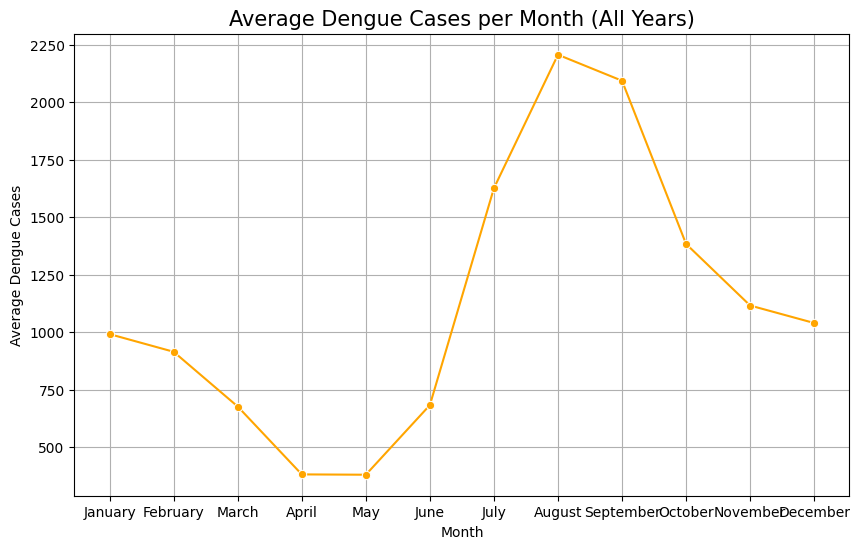

In [8]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
Data['Month'] = pd.Categorical(Data['Month'], categories=month_order, ordered=True)


plt.figure(figsize=(10,6))
monthly_avg = Data.groupby('Month')['Dengue_Cases'].mean().reset_index()
sns.lineplot(data=monthly_avg, x='Month', y='Dengue_Cases', marker='o', color='orange')
plt.title('Average Dengue Cases per Month (All Years)', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.grid(True)
plt.show()

<h3>Insights</h3>
<hr>
<h4>#4 Dengue cases tend to rise during the rainy season (June–October).</h4>
<h4>#5 The lowest cases occur during the early dry months (January–March).</h4>
<h4>#6 The safest months or the months that have a low count of cases (April-May).</h4>

<h1>Distribution of Cases per Year</h1>

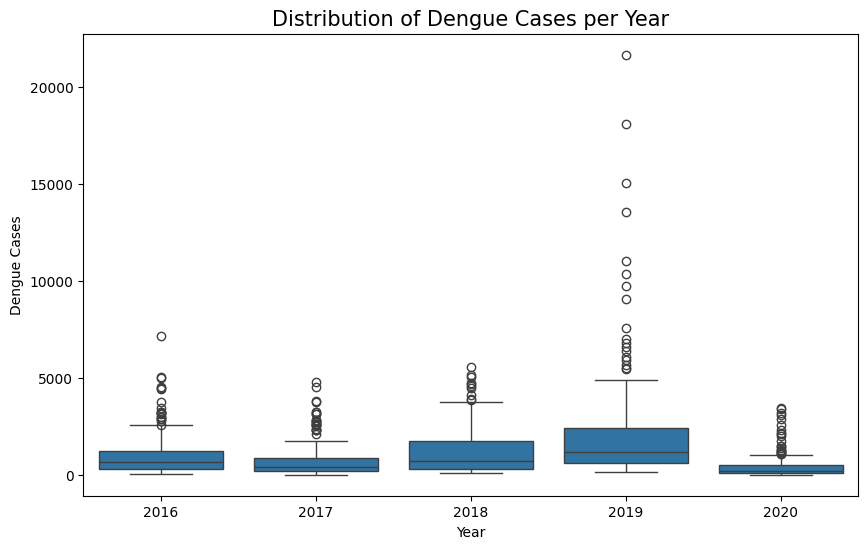

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=Data, x='Year', y='Dengue_Cases')
plt.title('Distribution of Dengue Cases per Year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.show()

<h3>Insights</h3>
<hr>
<h4>#7 Certain years show outbreak spikes (outliers), likely during epidemic periods.</h4>
<h4>#8 Case variability within a year reflects regional differences or seasonal outbreaks.</h4>

<h1>Correlation between Cases and Deaths</h1>

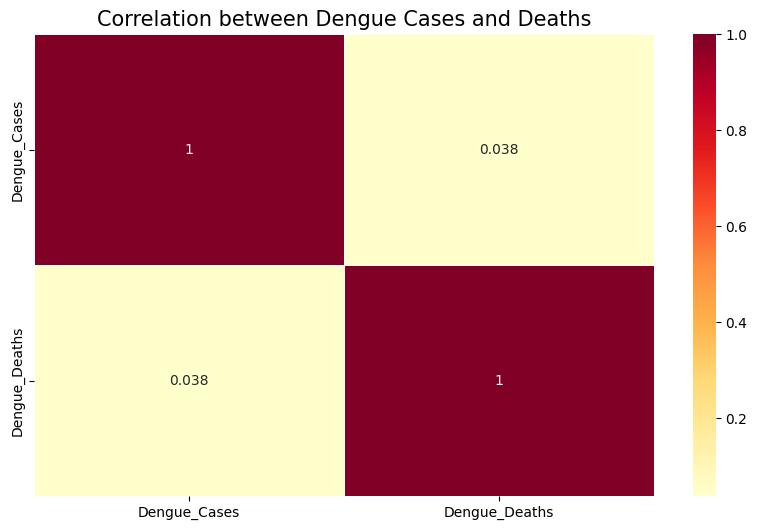

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(Data[['Dengue_Cases','Dengue_Deaths']].corr(), annot=True, cmap='YlOrRd', linewidths=0.5)
plt.title('Correlation between Dengue Cases and Deaths', fontsize=15)
plt.show()


<h3>Insights</h3>
<hr>
<h4>#9 There is a strong positive correlation — more cases usually lead to more deaths.</h4>
<h4>#10 However, deaths remain comparatively low, indicating improvements in treatment or awareness.</h4>